In [57]:
import matplotlib.pyplot as plt
import numpy as np

In [58]:
#Valores iniciais

V = 0.01 #m^3
Ar = 0.215 #m^2

Tr0 = 387.05 #K
Tc0 = 285 #K
cpc = 2 #kJ.kg^(-1).K^(-1)
cpr = 3.01 #kJ.kg^(-1).K^(-1)

rour = 934.2 #kg.m^(-3)
mc = 5 #kg
U = 67.2 #kJ.min^(-1).m(-2).K^(-1)

k01 = 2.145*(10**10) #1/min
k02 = 2.145*(10**10) #1/min
k03 = 1.5072*(10**8) #1/min.kmol

ER1 = 9758.3 #K
ER2 = 9758.3 #K
ER3 = 8560 #K

h1 = -4200 #kJ.kmol^(-1)
h2 = 11000 #kJ.kmol^(-1)
h3 = 41850 #kJ.kmol^(-1)

Ca0 = 5.1 #kmol/m^3
Cb0 = 0 #kmol/m^3

Qc = -18.56 #kJ.min^(-1)
qr = 0.002356 #m^3.min^(-1)

Ca = Ca0
Cb = Cb0
Tr = Tr0
Tc = Tc0

In [59]:
# Tempo

ti = 0
tf = 20
passo = 0.0001

In [60]:
#Vetores de concentração / temperatura / tempo

vetorCa = []
vetorCb = []

vetorTr = []
vetorTc = []

t =  []

In [61]:
#Equações diferenciais

while ti<tf:

    k1 = k01*(np.exp((-ER1)/Tr))
    k2 = k02*(np.exp((-ER2)/Tr))
    k3 = k03*(np.exp((-ER3)/Tr))

    r1 = k1*Ca
    r2 = k2*Cb
    r3 = k3*(Ca**2)

    hr = h1*r1+h2*r2+h3*r3

    Tc = Qc/(U*Ar)+Tr

    dcadt = -r1-r3+(qr/V)*(Ca0-Ca)
    dcbdt = r1-r2-(qr/V)*Cb
    dTrdt = (qr/V)*(Tr0-Tr)-(hr/(rour*cpr))+((Ar*U)/(V*rour*cpr))*(Tc-Tr)
    dTcdt = (1/(mc*cpc))*(Qc+(Ar*U*(Tr-Tc)))
    
    Ca = Ca + dcadt*passo
    Cb = Cb + dcbdt*passo
    Tr = Tr + dTrdt*passo
    Tc = Tc + dTcdt*passo
    ti = ti+passo
    
    vetorCa.append(Ca)
    vetorCb.append(Cb)
    vetorTr.append(Tr)
    vetorTc.append(Tc)
    t.append(ti)

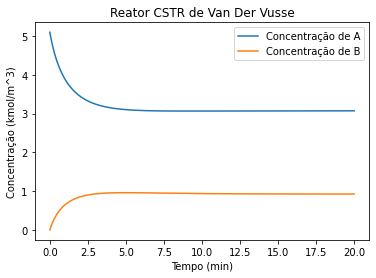

In [62]:
#Exibição gráfica (Concentrações)

plt.plot(t,vetorCa)
plt.plot(t, vetorCb)
plt.xlabel('Tempo (min)')
plt.ylabel('Concentração (kmol/m^3)')
plt.title('Reator CSTR de Van Der Vusse')
plt.legend(['Concentração de A','Concentração de B'])
plt.show()

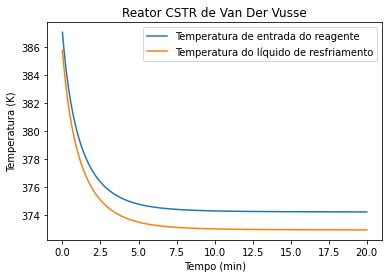

In [63]:
#Exibição gráfica (Temperaturas)

plt.plot(t,vetorTr)
plt.plot(t,vetorTc)
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (K)')
plt.title('Reator CSTR de Van Der Vusse')
plt.legend(['Temperatura de entrada do reagente','Temperatura do líquido de resfriamento'])
plt.show()